In [2]:
# Cargamos las librerias que necesitamos para empezar
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation




In [3]:

dades= pd.read_csv('wineData.txt')


dades.columns=[ 'Mostra','Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols', 'Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue', 'OD280/OD315 of diluted wines','Proline'] 
print(dades.head())


   Mostra  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0       1    13.20        1.78  2.14               11.2        100   
1       1    13.16        2.36  2.67               18.6        101   
2       1    14.37        1.95  2.50               16.8        113   
3       1    13.24        2.59  2.87               21.0        118   
4       1    14.20        1.76  2.45               15.2        112   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.65        2.76                  0.26             1.28   
1           2.80        3.24                  0.30             2.81   
2           3.85        3.49                  0.24             2.18   
3           2.80        2.69                  0.39             1.82   
4           3.27        3.39                  0.34             1.97   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0             4.38  1.05                          3.40     1050  
1             5.68  

In [35]:
#########################
# SELECCIÓN DE VARIABLES
#########################
#split dataset in features and target variable: you need to divide given columns into two types of variables dependent(or target variable) and independent variable(or feature variables).

Var_independents = ['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash','Magnesium','Total phenols','Flavanoids']
X = dades[Var_independents] # Features (característiques)
y = dades.Mostra # Target variable



In [36]:
################
# TRAIN TEST
################

# Split dataset into training set and test set: To understand model performance, dividing the dataset into a training set and a test set is a good strategy.
# Let's split the dataset by using function train_test_split(). You need to pass 3 parameters features, target, and test_set size.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test



In [37]:
########################################
# CREAR EL MODELO DE ARBOL DE DECISIÓN
########################################

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


In [49]:
####################
# EVALUAR EL MODELO
####################

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8888888888888888


In [50]:
################################################
# CREAR MODELO AJUSTANDO PARÁMETROS Y EVALUARLO
################################################

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8703703703703703


In [42]:
################################################
# CREAR MODELO KNN 
################################################

from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)



# The final step is to make predictions on our test data. To do so, execute the following script:

y_pred = classifier.predict(X_test)

acc =  classifier.score(X_test, y_test)
print(acc)

0.7592592592592593


In [44]:
###################################################
# REPETIMOS EL PROCESO PERO NORMALIZANDO LOS DATOS - Modelo KNN
###################################################

# - - > Normalizamos:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# - - > Creamos modelo de classificación (KNN):
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

# - - > Predecimos:
y_pred = classifier.predict(X_test)

# - - > Evaluamos:
acc =  classifier.score(X_test, y_test)

print(acc)

0.9074074074074074


In [51]:
###############################################
# DE NUEVO CLASIFICAMOS CON DATOS NORMALIZADOS - Modelo Árbol de decisión
###############################################

# - - > Normalizamos:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# - - > Creamos modelo de classificación (Arbol de decisión):

clf = DecisionTreeClassifier()

# - - > Entrenamos el modelo
clf = clf.fit(X_train,y_train)

# - - >  Predecimos la respuesta para los datos de testeo
y_pred = clf.predict(X_test)


# - - > Evaluamos:
acc = metrics.accuracy_score(y_test, y_pred)
print(acc)

#¿? Me da la misma acc?? Por que? - - - > < - - || NO LO ENTIENDO ||


0.8888888888888888


              precision    recall  f1-score   support

           1       1.00      0.95      0.98        22
           2       0.91      0.83      0.87        24
           3       0.64      0.88      0.74         8

    accuracy                           0.89        54
   macro avg       0.85      0.89      0.86        54
weighted avg       0.91      0.89      0.89        54



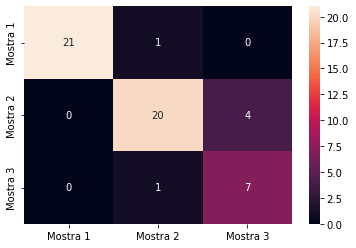

In [31]:
###############################################
# EVALUAMOS DE NUEVO LOS MODELOS 
###############################################

# Explicación: el parámetro acc (precisión == acuracy) nos proporciona información muy general de nuestro modelo, cuando nuestra precisión es del 0,9, lo que significa que el 90 % de las predicciones serán correctas, es que el 10 % de error se reparte igualitariamente? O todo el error se concentra en una sola clase? Para resolverlo podemos utilizar los siguientes métodos: 

# - - - >  classification_report, 
# - - - >  confusion_matrix


from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#importing Seaborn's to use the heatmap 
import seaborn as sns

# Adding classes names for better interpretation
classes_names = ['Mostra 1','Mostra 2','Mostra 3']
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), 
                  columns=classes_names, index = classes_names)
                  
# Seaborn's heatmap to better visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d');

print(classification_report(y_test, y_pred))

In [ ]:
#####################################
# ENTENDIENDO LA MATRIZ DE CONFUSIÓN 
#####################################

# En 4 ocasiones una muestra 2 se ha clasificado erroneamente como muestra 3


# PROS Y CONTRAS DEL MÉTODO KNN

# In this section, we'll present some of the pros and cons of using the KNN algorithm.
# Pros

#     It is easy to implement
#     It is a lazy learning algorithm and therefore doesn't require training on all data points (only using the K-Nearest neighbors to predict). This makes the KNN algorithm much faster than other algorithms that require training with the whole dataset such as Support Vector Machines, linear regression, etc.
#     Since KNN requires no training before making predictions, new data can be added seamlessly
#     There are only two parameters required to work with KNN, i.e. the value of K and the distance function

# Cons

#     The KNN algorithm doesn't work well with high dimensional data because with a large number of dimensions, the distance between points gets "weird", and the distance metrics we use don't hold up
#     Finally, the KNN algorithm doesn't work well with categorical features since it is difficult to find the distance between dimensions with categorical features


In [59]:
#####################################################
# PRUEVO OTRO DE LOS MODELOS EXPLICADO EN LA UNIDAD
#####################################################

# 1) # Support Vector Machines # 


#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy del modelo SVM:",metrics.accuracy_score(y_test, y_pred))

# PROS Y CONTRAS DEL MÉTODO SVM
# Advantages: SVM Classifiers offer good accuracy and perform faster prediction compared to Naïve Bayes algorithm. They also use less memory because they use a subset of training points in the decision phase. SVM works well with a clear margin of separation and with high dimensional space.
# Disadvantages: SVM is not suitable for large datasets because of its high training time and it also takes more time in training compared to Naïve Bayes. It works poorly with overlapping classes and is also sensitive to the type of kernel used.

###############################################################################################





Accuracy del modelo SVM: 0.8888888888888888


In [61]:
############################################
# FEM EL CROSS VALIDATION
############################################

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

 
 
kf = KFold(n_splits=5)
 
clf.fit(X_train, y_train)
 
score = clf.score(X_train,y_train)
 
print("Metrica del modelo", score)
 
scores = cross_val_score(clf, X_train, y_train, cv=kf, scoring="accuracy")
 
print("Metricas cross_validation", scores)
 
print("Media de cross_validation", scores.mean())
 
preds = clf.predict(X_test)
 
score_pred = metrics.accuracy_score(y_test, preds)
 
print("Metrica en Test", score_pred)



Metrica del modelo 0.991869918699187
Metricas cross_validation [0.92       0.96       0.92       0.875      0.91666667]
Media de cross_validation 0.9183333333333333
Metrica en Test 0.9629629629629629
